In [ ]:
import kagglehub
path = kagglehub.dataset_download("rohanrao/air-quality-data-in-india")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/air-quality-data-in-india


In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np

# Step 2: Load dataset
df = pd.read_csv("/kaggle/input/air-quality-data-in-india/city_day.csv")

# Step 3: Explore dataset
print("✅ Dataset Shape:", df.shape)

print("\n--- INFO ---")
print(df.info())

print("\n--- DESCRIBE ---")
print(df.describe())

print("\n--- MISSING VALUES ---")
print(df.isnull().sum())

print("\n--- FIRST 5 ROWS ---")
print(df.head())


✅ Dataset Shape: (29531, 16)

--- INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB
None

--- DESCRIBE ---
              PM2.5          PM10 

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in greater



In [ ]:
# Step 1: Import libraries
import pandas as pd
import numpy as np

# Load dataset (adjust folder name if needed)
df = pd.read_csv("/kaggle/input/air-quality-data-in-india/city_day.csv")

# Display first rows
df.head()


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in greater



,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:

print(df.info())
print("\nMissing values per column:\n", df.isnull().sum())


df = df.dropna(subset=['AQI'])

for col in ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']:
    df[col] = df[col].fillna(df[col].median())


print("\nAfter cleaning, missing values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB
None

Missing values per column:
 City              0
Date              0
PM2.5          4598
PM10  

In [ ]:
# Function to categorize AQI
def categorize_aqi(aqi):
    if aqi <= 50:
        return "Good"
    elif aqi <= 100:
        return "Satisfactory"
    elif aqi <= 200:
        return "Moderate"
    elif aqi <= 300:
        return "Poor"
    elif aqi <= 400:
        return "Very Poor"
    else:
        return "Severe"

# Apply function
df['AQI_Category'] = df['AQI'].apply(categorize_aqi)

# Check categories
df[['AQI', 'AQI_Category']].head()


,AQI,AQI_Category
28,209.0,Poor
29,328.0,Very Poor
30,514.0,Severe
31,782.0,Severe
32,914.0,Severe


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for attractive plots
sns.set(style="whitegrid", palette="pastel")


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



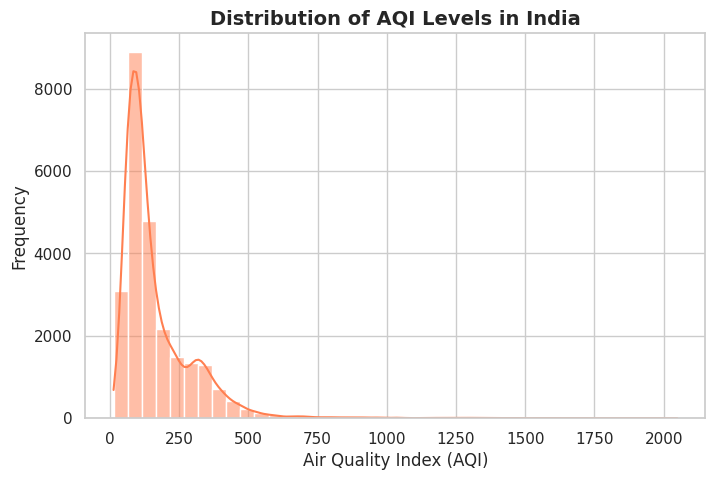

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['AQI'], bins=40, kde=True, color="coral")
plt.title("Distribution of AQI Levels in India", fontsize=14, weight="bold")
plt.xlabel("Air Quality Index (AQI)")
plt.ylabel("Frequency")
plt.show()


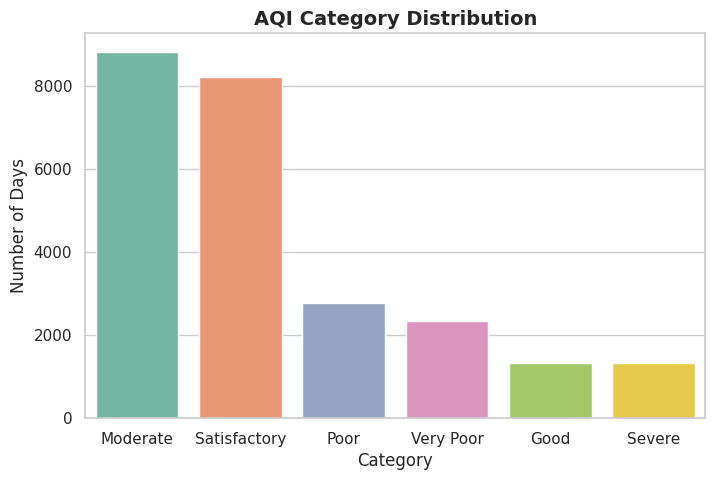

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x="AQI_Category", data=df, order=df['AQI_Category'].value_counts().index, palette="Set2")
plt.title("AQI Category Distribution", fontsize=14, weight="bold")
plt.xlabel("Category")
plt.ylabel("Number of Days")
plt.show()


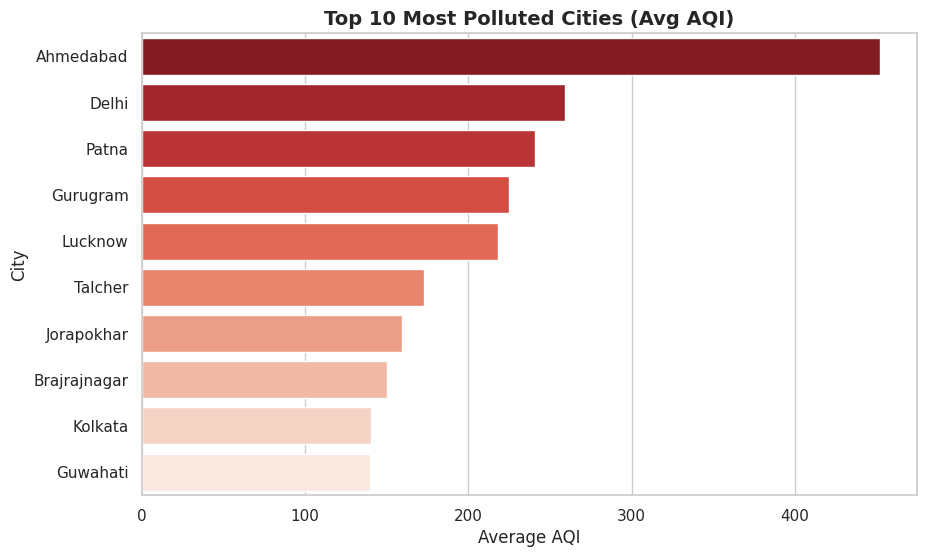

In [ ]:
city_avg = df.groupby("City")['AQI'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=city_avg.values, y=city_avg.index, palette="Reds_r")
plt.title("Top 10 Most Polluted Cities (Avg AQI)", fontsize=14, weight="bold")
plt.xlabel("Average AQI")
plt.ylabel("City")
plt.show()


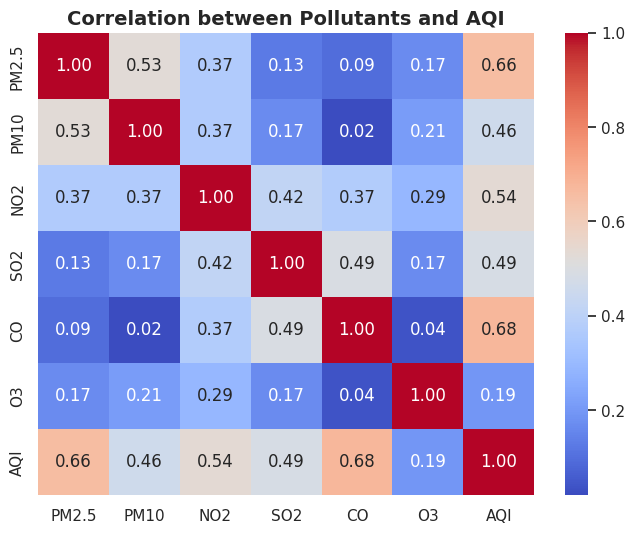

In [ ]:
plt.figure(figsize=(8,6))
corr = df[['PM2.5','PM10','NO2','SO2','CO','O3','AQI']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Pollutants and AQI", fontsize=14, weight="bold")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features and Target
X = df[['PM2.5','PM10','NO2','SO2','CO','O3']]
y = df['AQI']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Predictions
y_pred = reg_model.predict(X_test)

# Evaluation
print("📌 Regression Results")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


📌 Regression Results
MSE: 3544.05916999534
R² Score: 0.8064521285443192


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Encode category labels
le = LabelEncoder()
df['AQI_Label'] = le.fit_transform(df['AQI_Category'])

# Features and Target
X = df[['PM2.5','PM10','NO2','SO2','CO','O3']]
y = df['AQI_Label']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
print("📌 Classification Results")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


📌 Classification Results
Accuracy: 0.7963782696177062

Classification Report:
               precision    recall  f1-score   support

        Good       0.81      0.61      0.69       282
    Moderate       0.81      0.83      0.82      1745
        Poor       0.68      0.63      0.65       555
Satisfactory       0.82      0.86      0.84      1655
      Severe       0.85      0.81      0.83       271
   Very Poor       0.76      0.75      0.76       462

    accuracy                           0.80      4970
   macro avg       0.79      0.75      0.76      4970
weighted avg       0.80      0.80      0.79      4970



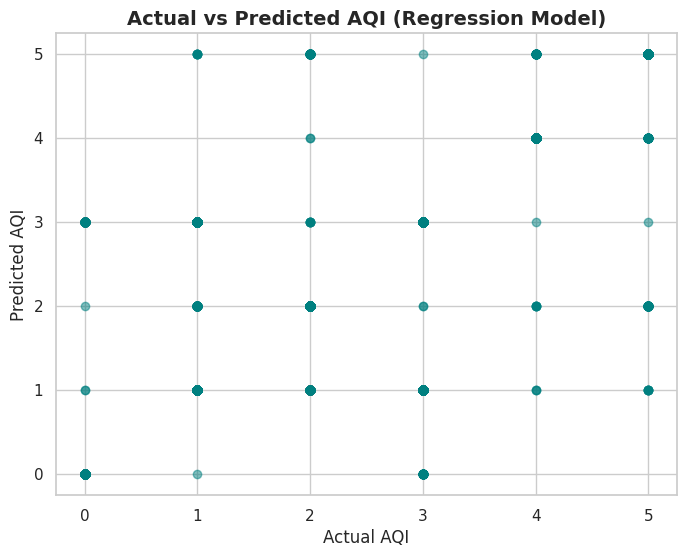

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color="teal")
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI (Regression Model)", fontsize=14, weight="bold")
plt.show()


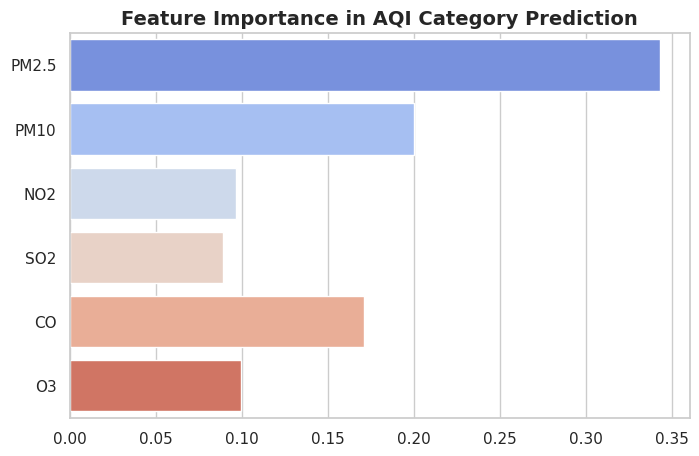

In [ ]:
importances = clf.feature_importances_
features = X.columns

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=features, palette="coolwarm")
plt.title("Feature Importance in AQI Category Prediction", fontsize=14, weight="bold")
plt.show()


In [ ]:
!pip install plotly
import plotly.express as px
import plotly.graph_objects as go



In [ ]:
fig = px.scatter(
    x=y_test, y=y_pred,
    labels={'x':'Actual AQI','y':'Predicted AQI'},
    title="📊 Actual vs Predicted AQI (Regression Model)",
    color_discrete_sequence=["#FF69B4"]
)
fig.add_trace(go.Scatter(x=[min(y_test),max(y_test)], y=[min(y_test),max(y_test)],
                         mode="lines", name="Perfect Prediction", line=dict(color="green",dash="dash")))
fig.show()


In [ ]:
feat_imp = pd.DataFrame({'Feature':X.columns,'Importance':clf.feature_importances_})
feat_imp = feat_imp.sort_values(by='Importance',ascending=False)

fig = px.bar(
    feat_imp, 
    x="Importance", y="Feature", orientation="h",
    title="🌍 Feature Importance for AQI Category Prediction",
    color="Importance", color_continuous_scale="teal"
)
fig.show()


In [ ]:
feat_imp = pd.DataFrame({'Feature':X.columns,'Importance':clf.feature_importances_})
feat_imp = feat_imp.sort_values(by='Importance',ascending=False)

fig = px.bar(
    feat_imp, 
    x="Importance", y="Feature", orientation="h",
    title="🌍 Feature Importance for AQI Category Prediction",
    color="Importance", color_continuous_scale="teal"
)
fig.show()


In [ ]:
fig = px.line(
    df, x="Date", y="AQI", 
    title="📈 AQI Trend Over Time",
    markers=True, color_discrete_sequence=["#FF6347"]
)
fig.show()


In [ ]:
fig = px.pie(
    df, names="AQI_Category", 
    title="🟢 AQI Category Distribution",
    hole=0.3, color_discrete_sequence=px.colors.sequential.RdPu
)
fig.show()
fig = px.pie(
    df, names="AQI_Category", 
    title="🟢 AQI Category Distribution",
    hole=0.3, color_discrete_sequence=px.colors.sequential.RdPu
)
fig.show()


In [ ]:
# ------------------------------
# STEP 2: Data Preprocessing
# ------------------------------
import numpy as np

# Drop columns not useful for ML
df_ml = df.drop(columns=["City", "Date", "AQI"])  # We keep AQI_Category as target

# Handle missing values (replace with column mean)
df_ml = df_ml.fillna(df_ml.mean(numeric_only=True))

# Encode target (AQI_Category) into numbers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_ml["AQI_Category"] = le.fit_transform(df_ml["AQI_Category"])

# Separate features (X) and target (y)
X = df_ml.drop(columns=["AQI_Category"])
y = df_ml["AQI_Category"]

print("✅ Preprocessing Done")
print("Feature columns:", X.columns.tolist())
print("Target classes:", le.classes_)



✅ Preprocessing Done
Feature columns: ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI_Bucket', 'AQI_Label']
Target classes: ['Good' 'Moderate' 'Poor' 'Satisfactory' 'Severe' 'Very Poor']


In [ ]:
df.dtypes


City             object
Date             object
PM2.5           float64
PM10            float64
NO              float64
NO2             float64
NOx             float64
NH3             float64
CO              float64
SO2             float64
O3              float64
Benzene         float64
Toluene         float64
Xylene          float64
AQI             float64
AQI_Bucket       object
AQI_Category     object
AQI_Label         int64
dtype: object

In [ ]:
# Drop rows where any pollutant value is NaN
df_clean = df.dropna(subset=["PM2.5","PM10","NO","NO2","NOx","NH3","CO","SO2","O3","Benzene","Toluene","Xylene"])

X = df_clean[["PM2.5","PM10","NO","NO2","NOx","NH3","CO","SO2","O3","Benzene","Toluene","Xylene"]]
y = df_clean["AQI_Category"]


In [ ]:
from sklearn.impute import SimpleImputer

# Replace NaN with column mean
imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(df[["PM2.5","PM10","NO","NO2","NOx","NH3","CO","SO2","O3","Benzene","Toluene","Xylene"]])

y = df["AQI_Category"]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        Good       0.85      0.65      0.74       282
    Moderate       0.81      0.86      0.84      1745
        Poor       0.70      0.63      0.66       555
Satisfactory       0.85      0.86      0.86      1655
      Severe       0.85      0.76      0.81       271
   Very Poor       0.75      0.76      0.76       462

    accuracy                           0.81      4970
   macro avg       0.80      0.76      0.78      4970
weighted avg       0.81      0.81      0.81      4970



/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.



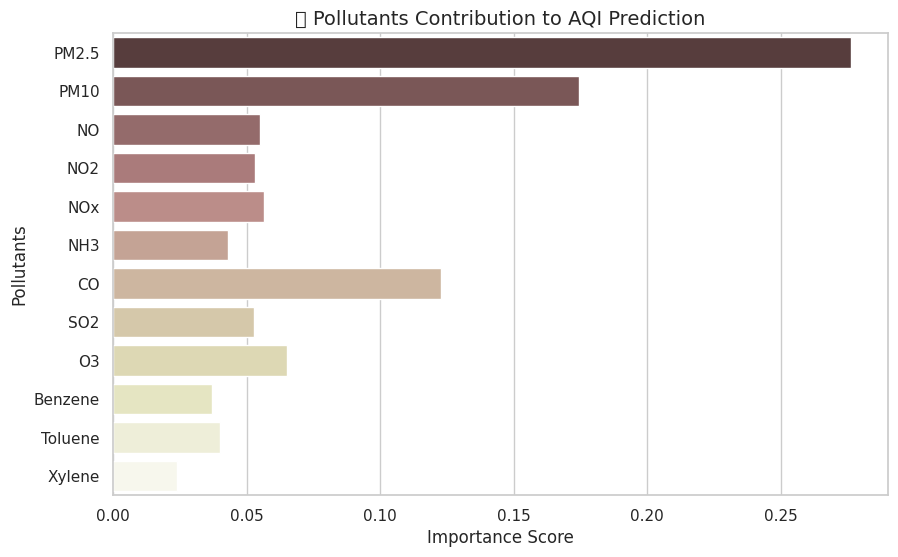

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance
importances = model.feature_importances_
features = ["PM2.5","PM10","NO","NO2","NOx","NH3","CO","SO2","O3","Benzene","Toluene","Xylene"]

# Plot bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features, palette="pink")
plt.title("🌍 Pollutants Contribution to AQI Prediction", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Pollutants")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from current font.



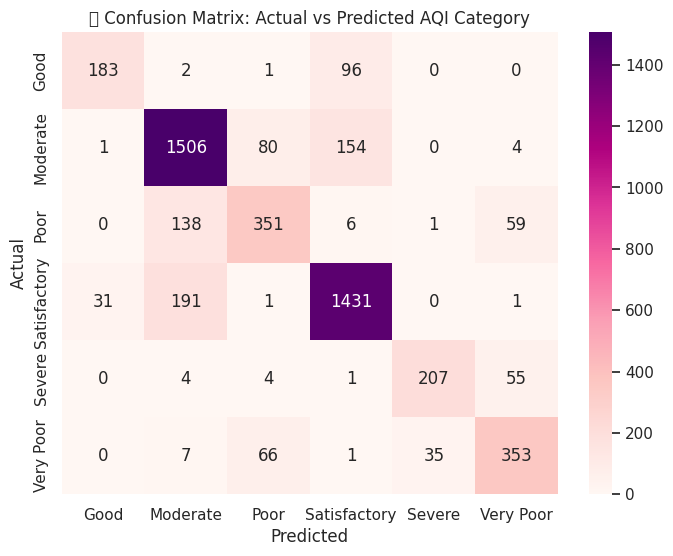

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="RdPu", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("📊 Confusion Matrix: Actual vs Predicted AQI Category")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
fig = px.histogram(
    df, 
    x="City",   # ✅ Capital C
    color="AQI_Bucket", 
    barmode="group",
    title="🏙️ City-wise AQI Distribution",
    color_discrete_sequence=px.colors.sequential.Pinkyl
)
fig.show()


In [ ]:
# ✅ Group by City and calculate average AQI
city_avg = df.groupby("City")["AQI"].mean().reset_index()

# ✅ Plot average AQI per city
fig = px.bar(
    city_avg, 
    x="City", 
    y="AQI",
    color="AQI",
    title="🌆 Average AQI by City",
    color_continuous_scale=px.colors.sequential.RdPu
)
fig.show()


In [ ]:
# ✅ Convert Date column to datetime (if not already)
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# ✅ Sort by date
df = df.sort_values(by="Date")

# ✅ Plot AQI trends for each city
fig = px.line(
    df, 
    x="Date", 
    y="AQI", 
    color="City",
    title="📈 AQI Trends Over Time (City-wise)",
    labels={"AQI": "Air Quality Index", "Date": "Timeline"}
)
fig.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 127775 (\N{GLOWING STAR}) missing from current font.



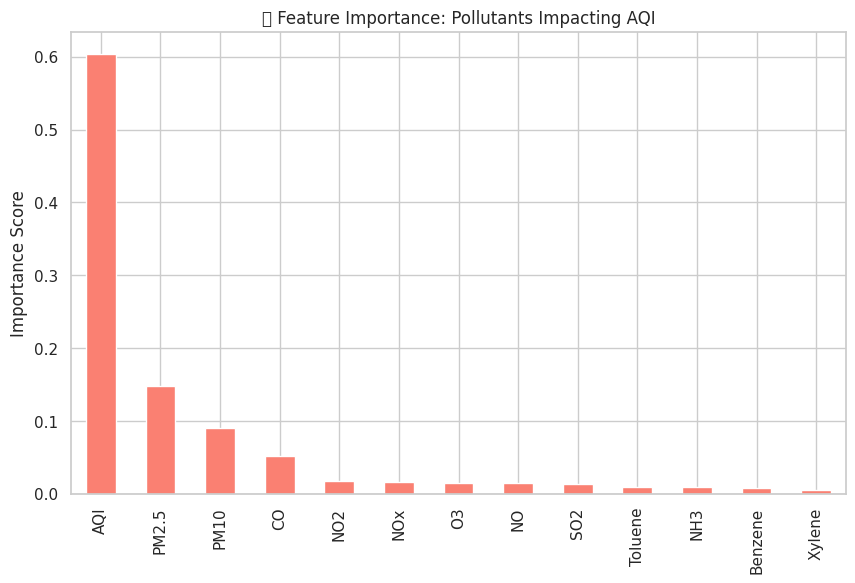

In [ ]:
# Drop non-numeric + target columns
X = df.drop(columns=["AQI_Bucket", "AQI_Category", "AQI_Label", "Date", "City"])
y = df["AQI_Category"]

# Handle missing values (option 1: fill with median)
X = X.fillna(X.median())

# Train Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10,6))
importances.plot(kind='bar', color="salmon")
plt.title("🌟 Feature Importance: Pollutants Impacting AQI")
plt.ylabel("Importance Score")
plt.show()


In [ ]:
# Target variable
y = df["AQI_Bucket"]   


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["AQI_Category"] = le.fit_transform(df["AQI_Bucket"])  # New numeric column


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
df = pd.read_csv("/kaggle/input/air-quality-data-in-india/city_day.csv")

# Drop rows with missing AQI_Bucket
df = df.dropna(subset=["AQI_Bucket"])

# Encode AQI_Bucket → numeric labels
le = LabelEncoder()
df["AQI_Category"] = le.fit_transform(df["AQI_Bucket"])

# Features (all pollutant columns)
X = df[["PM2.5","PM10","NO","NO2","NOx","NH3","CO","SO2","O3","Benzene","Toluene","Xylene"]]

# Fill missing values with median
X = X.fillna(X.median())

# Target
y = df["AQI_Category"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=le.classes_))


✅ Accuracy: 0.8088531187122736

--- Classification Report ---
              precision    recall  f1-score   support

        Good       0.84      0.64      0.73       282
    Moderate       0.82      0.86      0.84      1745
        Poor       0.69      0.64      0.67       555
Satisfactory       0.84      0.86      0.85      1655
      Severe       0.85      0.77      0.81       271
   Very Poor       0.75      0.75      0.75       462

    accuracy                           0.81      4970
   macro avg       0.80      0.75      0.77      4970
weighted avg       0.81      0.81      0.81      4970



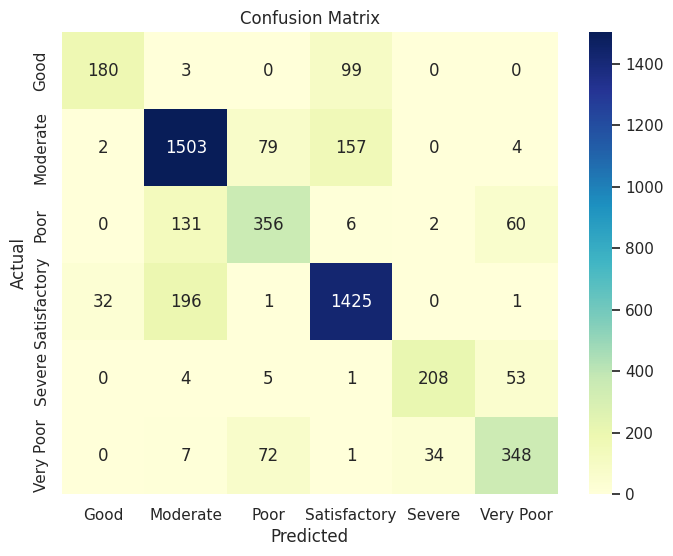

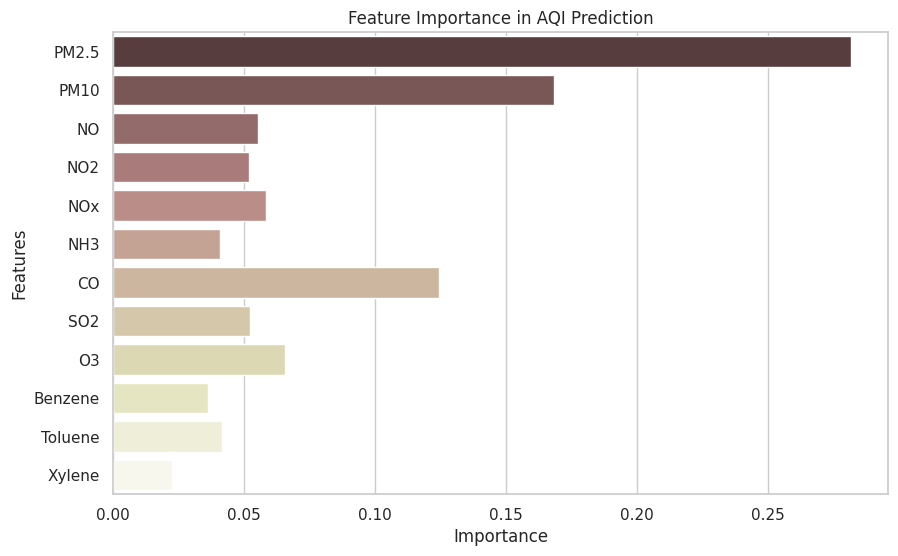

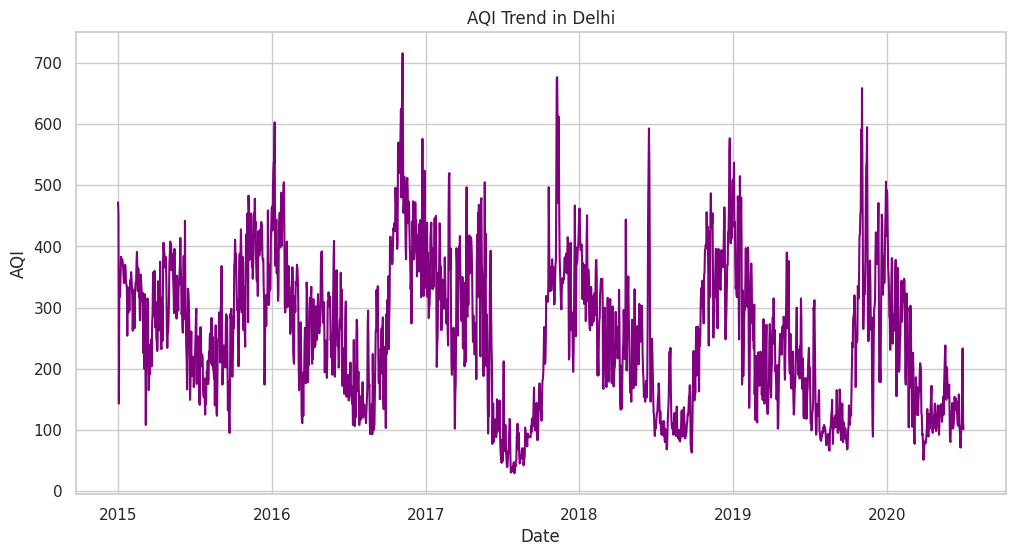

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# --- Feature Importance ---
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features, palette="pink")
plt.title("Feature Importance in AQI Prediction")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# --- AQI Trends over Time (example for Delhi) ---
delhi_data = df[df["City"]=="Delhi"].copy()
delhi_data["Date"] = pd.to_datetime(delhi_data["Date"])

plt.figure(figsize=(12,6))
plt.plot(delhi_data["Date"], delhi_data["AQI"], color="purple")
plt.title("AQI Trend in Delhi")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Print detailed classification metrics
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=le.classes_))



--- Classification Report ---
              precision    recall  f1-score   support

        Good       0.84      0.64      0.73       282
    Moderate       0.82      0.86      0.84      1745
        Poor       0.69      0.64      0.67       555
Satisfactory       0.84      0.86      0.85      1655
      Severe       0.85      0.77      0.81       271
   Very Poor       0.75      0.75      0.75       462

    accuracy                           0.81      4970
   macro avg       0.80      0.75      0.77      4970
weighted avg       0.81      0.81      0.81      4970



In [ ]:
import plotly.express as px

fig = px.line(delhi_data, x="Date", y="AQI", title="Delhi AQI Trend (Interactive)")
fig.show()
